# Import Data and Library

In [1]:
import os
os.chdir(r'C:\Users\nadda\Desktop\KU\01204314-65-Statistics-for-Computer-Engineering-Applications\final_project\part1')
os.getcwd()

'C:\\Users\\nadda\\Desktop\\KU\\01204314-65-Statistics-for-Computer-Engineering-Applications\\final_project\\part1'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [3]:
orig_df = pd.read_csv('worldbank_2017_2021.csv')
fig_folder = ''
orig_df.head(10)

,Country Name,Year,Agricultural irrigated land (% of total agricultural land),Agricultural land (% of land area),"Agriculture, forestry, and fishing, value added (% of GDP)",Arable land (% of land area),Cereal yield (kg per hectare),Crop production index (2014-2016 = 100),Fertilizer consumption (kilograms per hectare of arable land),Food production index (2014-2016 = 100),...,Merchandise exports (current US$),Merchandise imports (current US$),Merchandise trade (% of GDP),"Contributing family workers, female (% of female employment) (modeled ILO estimate)","Contributing family workers, male (% of male employment) (modeled ILO estimate)",Firms with female participation in ownership (% of firms),Firms with female top manager (% of firms),"Proportion of time spent on unpaid domestic and care work, female (% of 24 hour day)","Proportion of time spent on unpaid domestic and care work, male (% of 24 hour day)","Women making their own informed decisions regarding sexual relations, contraceptive use and reproductive health care (% of women age 15-49)"
0,Afghanistan,2017,5.99,58.12,26.42,11.80,2091.4,99.21,20.45,99.84,...,7.230000e+08,7.065000e+09,41.53,62.58,12.20,NaN,NaN,NaN,NaN,NaN
1,Albania,2017,14.56,42.86,19.02,22.34,4813.0,105.84,99.81,103.88,...,2.292000e+09,5.271000e+09,58.09,29.97,17.04,NaN,NaN,NaN,NaN,NaN
2,Algeria,2017,3.16,17.36,11.03,3.14,990.3,104.40,20.84,102.87,...,3.519100e+10,4.605900e+10,42.79,2.33,1.70,NaN,NaN,NaN,NaN,NaN
3,American Samoa,2017,NaN,13.90,NaN,4.65,NaN,NaN,41.67,NaN,...,3.970000e+08,5.950000e+08,162.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,2017,NaN,40.04,0.56,1.74,NaN,NaN,NaN,NaN,...,1.180000e+08,1.478000e+09,53.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Angola,2017,NaN,36.71,10.02,4.29,809.0,104.58,9.77,105.13,...,3.461300e+10,1.446300e+10,66.60,6.17,3.71,NaN,NaN,NaN,NaN,NaN
6,Antigua and Barbuda,2017,NaN,20.45,1.66,9.09,2030.7,89.69,5.26,93.31,...,2.100000e+07,5.540000e+08,37.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Argentina,2017,NaN,42.99,5.23,14.76,5404.6,106.82,41.07,105.91,...,5.864400e+10,6.693700e+10,19.51,0.82,0.36,57.8,8.0,NaN,NaN,NaN
8,Armenia,2017,9.23,58.87,14.99,15.67,1975.1,87.87,202.55,95.24,...,2.245000e+09,4.189000e+09,55.81,0.22,0.30,NaN,NaN,NaN,NaN,NaN
9,Aruba,2017,NaN,11.11,0.02,11.11,NaN,NaN,2.49,NaN,...,1.350000e+08,1.124000e+09,40.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df=orig_df.copy()
temp_df=df.drop(['Country Name'], axis=1)
temp_df = temp_df.dropna(axis=1, how='all') # drop columns where all values are NaN

dummy_df=pd.get_dummies(temp_df)
dummy_df.columns

Index(['Year', 'Agricultural irrigated land (% of total agricultural land)',
       'Agricultural land (% of land area)',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'Arable land (% of land area)', 'Cereal yield (kg per hectare)',
       'Crop production index (2014-2016 = 100)',
       'Fertilizer consumption (kilograms per hectare of arable land)',
       'Food production index (2014-2016 = 100)',
       'Forest area (% of land area)',
       ...
       'Merchandise exports (current US$)',
       'Merchandise imports (current US$)', 'Merchandise trade (% of GDP)',
       'Contributing family workers, female (% of female employment) (modeled ILO estimate)',
       'Contributing family workers, male (% of male employment) (modeled ILO estimate)',
       'Firms with female participation in ownership (% of firms)',
       'Firms with female top manager (% of firms)',
       'Proportion of time spent on unpaid domestic and care work, female (% of 24 hour da

In [5]:
cols = set(dummy_df.columns)
cols

{'Access to electricity (% of population)',
 'Adjusted net savings, including particulate emission damage (% of GNI)',
 'Age dependency ratio (% of working-age population)',
 'Agricultural irrigated land (% of total agricultural land)',
 'Agricultural land (% of land area)',
 'Agriculture, forestry, and fishing, value added (% of GDP)',
 'Air transport, registered carrier departures worldwide',
 'Annual freshwater withdrawals, total (% of internal resources)',
 'Arable land (% of land area)',
 'Bird species, threatened',
 'Birth rate, crude (per 1,000 people)',
 'Births attended by skilled health staff (% of total)',
 'CPIA economic management cluster average (1=low to 6=high)',
 'CPIA policies for social inclusion/equity cluster average (1=low to 6=high)',
 'CPIA public sector management and institutions cluster average (1=low to 6=high)',
 'CPIA structural policies cluster average (1=low to 6=high)',
 'Central government debt, total (% of GDP)',
 'Cereal yield (kg per hectare)',
 'Ch

In [6]:
all_vars = [
    'Access to electricity (% of population)',
 'Adjusted net savings, including particulate emission damage (% of GNI)',
 'Age dependency ratio (% of working-age population)',
 'Agricultural irrigated land (% of total agricultural land)',
 'Agricultural land (% of land area)',
 'Agriculture, forestry, and fishing, value added (% of GDP)',
 'Air transport, registered carrier departures worldwide',
 'Annual freshwater withdrawals, total (% of internal resources)',
 'Arable land (% of land area)',
 'Bird species, threatened',
 'Birth rate, crude (per 1,000 people)',
 'Births attended by skilled health staff (% of total)',
 'CPIA economic management cluster average (1=low to 6=high)',
 'CPIA policies for social inclusion/equity cluster average (1=low to 6=high)',
 'CPIA public sector management and institutions cluster average (1=low to 6=high)',
 'CPIA structural policies cluster average (1=low to 6=high)',
 'Central government debt, total (% of GDP)',
 'Cereal yield (kg per hectare)',
 'Children out of school, primary, female',
 'Children out of school, primary, male',
 'Completeness of birth registration (%)',
 'Completeness of death registration with cause-of-death information (%)',
 'Container port traffic (TEU: 20 foot equivalent units)',
 'Contraceptive prevalence, any method (% of married women ages 15-49)',
 'Contributing family workers, female (% of female employment) (modeled ILO estimate)',
 'Contributing family workers, male (% of male employment) (modeled ILO estimate)',
 'Crop production index (2014-2016 = 100)',
 'Current account balance (BoP, current US$)',
 'Death rate, crude (per 1,000 people)',
 'Diabetes prevalence (% of population ages 20 to 79)',
 'Ease of doing business rank (1=most business-friendly regulations)',
 'Electric power consumption (kWh per capita)',
 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
 'Expense (% of GDP)',
 'Exports of goods and services (% of GDP)',
 'External debt stocks (% of GNI)',
 'External debt stocks, total (DOD, current US$)',
 'Fertility rate, total (births per woman)',
 'Fertilizer consumption (kilograms per hectare of arable land)',
 'Firms with female participation in ownership (% of firms)',
 'Firms with female top manager (% of firms)',
 'Fish species, threatened',
 'Fixed broadband subscriptions (per 100 people)',
 'Fixed telephone subscriptions (per 100 people)',
 'Food production index (2014-2016 = 100)',
 'Forest area (% of land area)',
 'Forest area (sq. km)',
 'Fuel exports (% of merchandise exports)',
 'GDP (current US$)',
 'GDP growth (annual %)',
 'GNI, PPP (current international $)',
 'GNI per capita, PPP (current international $)',
 'Government expenditure on education, total (% of GDP)',
 'Government expenditure per student, primary (% of GDP per capita)',
 'Government expenditure per student, secondary (% of GDP per capita)',
 'Government expenditure per student, tertiary (% of GDP per capita)',
 'Grants, excluding technical cooperation (BoP, current US$)',
 'Gross intake ratio in first grade of primary education, female (% of relevant age group)',
 'Gross intake ratio in first grade of primary education, male (% of relevant age group)',
 'Gross savings (% of GDP)',
 'High-technology exports (% of manufactured exports)',
 'High-technology exports (current US$)',
 'Hospital beds (per 1,000 people)',
 'IDA resource allocation index (1=low to 6=high)',
 'Immunization, DPT (% of children ages 12-23 months)',
 'Immunization, measles (% of children ages 12-23 months)',
 'Imports of goods and services (% of GDP)',
 'Incidence of tuberculosis (per 100,000 people)',
 'Industry (including construction), value added (% of GDP)',
 'Inflation, consumer prices (annual %)',
 'Intentional homicides (per 100,000 people)',
 'International tourism, expenditures (% of total imports)',
 'International tourism, receipts (% of total exports)',
 'Investment in energy with private participation (current US$)',
 'Investment in transport with private participation (current US$)',
 'Investment in water and sanitation with private participation (current US$)',
 'Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)',
 'Labor force participation rate, male (% of male population ages 15+) (modeled ILO estimate)',
 'Labor force, female (% of total labor force)',
 'Labor force, total',
 'Land area (sq. km)',
 'Lead time to export, median case (days)',
 'Lead time to import, median case (days)',
 'Life expectancy at birth, female (years)',
 'Life expectancy at birth, male (years)',
 'Life expectancy at birth, total (years)',
 'Literacy rate, adult female (% of females ages 15 and above)',
 'Literacy rate, adult male (% of males ages 15 and above)',
 'Literacy rate, adult total (% of people ages 15 and above)',
 'Literacy rate, youth female (% of females ages 15-24)',
 'Literacy rate, youth male (% of males ages 15-24)',
 'Literacy rate, youth total (% of people ages 15-24)',
 'Livestock production index (2014-2016 = 100)',
 'Logistics performance index: Overall (1=low to 5=high)',
 'Mammal species, threatened',
 'Maternal mortality ratio (modeled estimate, per 100,000 live births)',
 'Medium and high-tech exports (% manufactured exports)',
 'Medium and high-tech manufacturing value added (% manufacturing value added)',
 'Merchandise exports (current US$)',
 'Merchandise imports (current US$)',
 'Merchandise trade (% of GDP)',
 'Military expenditure (% of GDP)',
 'Mobile cellular subscriptions (per 100 people)',
 'Mortality caused by road traffic injury (per 100,000 population)',
 'Mortality rate, under-5 (per 1,000 live births)',
 'Net ODA received (% of GNI)',
 'Net ODA received per capita (current US$)',
 'Net acquisition of financial assets (% of GDP)',
 'Net incurrence of liabilities, total (% of GDP)',
 'Net investment in nonfinancial assets (% of GDP)',
 'Net lending (+) / net borrowing (-) (% of GDP)',
 'Net migration',
 'Net official development assistance received (current US$)',
 'Number of surgical procedures (per 100,000 population)',
 'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)',
 'PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)',
 'Permanent cropland (% of land area)',
 'Persistence to last grade of primary, female (% of cohort)',
 'Persistence to last grade of primary, male (% of cohort)',
 'Plant species (higher), threatened',
 'Population ages 0-14 (% of total population)',
 'Population ages 15-64 (% of total population)',
 'Population ages 65 and above (% of total population)',
 'Population growth (annual %)',
 'Population in urban agglomerations of more than 1 million (% of total population)',
 'Population living in slums (% of urban population)',
 'Population, female (% of total population)',
 'Population, total',
 'Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)',
 'Pregnant women receiving prenatal care (%)',
 'Prevalence of HIV, total (% of population ages 15-49)',
 'Prevalence of anemia among children (% of children ages 6-59 months)',
 'Prevalence of overweight, weight for height (% of children under 5)',
 'Prevalence of severe wasting, weight for height (% of children under 5)',
 'Prevalence of stunting, height for age (% of children under 5)',
 'Prevalence of undernourishment (% of population)',
 'Prevalence of underweight, weight for age (% of children under 5)',
 'Prevalence of wasting, weight for height (% of children under 5)',
 'Price level ratio of PPP conversion factor (GDP) to market exchange rate',
 'Primary completion rate, total (% of relevant age group)',
 'Progression to secondary school, female (%)',
 'Progression to secondary school, male (%)',
 'Proportion of seats held by women in national parliaments (%)',
 'Proportion of time spent on unpaid domestic and care work, female (% of 24 hour day)',
 'Proportion of time spent on unpaid domestic and care work, male (% of 24 hour day)',
 'Public private partnerships investment in ICT (current US$)',
 'Pupil-teacher ratio, primary',
 'Rail lines (total route-km)',
 'Renewable electricity output (% of total electricity output)',
 'Renewable energy consumption (% of total final energy consumption)',
 'Renewable internal freshwater resources per capita (cubic meters)',
 'Renewable internal freshwater resources, total (billion cubic meters)',
 'Repeaters, primary, female (% of female enrollment)',
 'Repeaters, primary, male (% of male enrollment)',
 'Revenue, excluding grants (% of GDP)',
 'Risk of catastrophic expenditure for surgical care (% of people at risk)',
 'Risk of impoverishing expenditure for surgical care (% of people at risk)',
 'Rural population',
 'Rural population (% of total population)',
 'School enrollment, preprimary (% gross)',
 'School enrollment, primary (% gross)',
 'School enrollment, primary (% net)',
 'School enrollment, primary (gross), gender parity index (GPI)',
 'School enrollment, primary and secondary (gross), gender parity index (GPI)',
 'School enrollment, secondary (% gross)',
 'School enrollment, secondary (% net)',
 'School enrollment, tertiary (% gross)',
 'Secure Internet servers (per 1 million people)',
 'Short-term debt (% of total reserves)',
 'Specialist surgical workforce (per 100,000 population)',
 'Strength of legal rights index (0=weak to 12=strong)',
 'Surface area (sq. km)',
 'Technical cooperation grants (BoP, current US$)',
 'Teenage mothers (% of women ages 15-19 who have had children or are currently pregnant)',
 'Total debt service (% of exports of goods, services and primary income)',
 'Total reserves (includes gold, current US$)',
 'Total tax and contribution rate (% of profit)',
 'Trained teachers in primary education (% of total teachers)',
 'Unemployment, total (% of total labor force) (modeled ILO estimate)',
 'Unmet need for contraception (% of married women ages 15-49)',
 'Urban population',
 'Urban population (% of total population)',
 'Vulnerable employment, female (% of female employment) (modeled ILO estimate)',
 'Vulnerable employment, male (% of male employment) (modeled ILO estimate)',
 'Women making their own informed decisions regarding sexual relations, contraceptive use and reproductive health care (% of women age 15-49)',
 'Year'
]

input_vars = all_vars.copy()
input_vars.remove('GNI per capita, PPP (current international $)')
input_vars

['Access to electricity (% of population)',
 'Adjusted net savings, including particulate emission damage (% of GNI)',
 'Age dependency ratio (% of working-age population)',
 'Agricultural irrigated land (% of total agricultural land)',
 'Agricultural land (% of land area)',
 'Agriculture, forestry, and fishing, value added (% of GDP)',
 'Air transport, registered carrier departures worldwide',
 'Annual freshwater withdrawals, total (% of internal resources)',
 'Arable land (% of land area)',
 'Bird species, threatened',
 'Birth rate, crude (per 1,000 people)',
 'Births attended by skilled health staff (% of total)',
 'CPIA economic management cluster average (1=low to 6=high)',
 'CPIA policies for social inclusion/equity cluster average (1=low to 6=high)',
 'CPIA public sector management and institutions cluster average (1=low to 6=high)',
 'CPIA structural policies cluster average (1=low to 6=high)',
 'Central government debt, total (% of GDP)',
 'Cereal yield (kg per hectare)',
 'Ch

# Cleaning & Outlier Removing

## Filter Missing Value (Threshold = 60%)

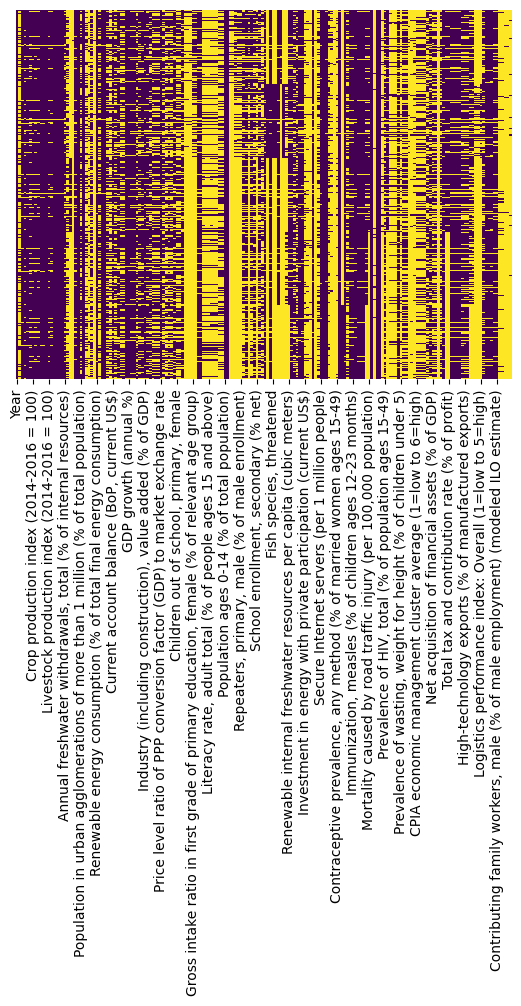

In [7]:
# Use heatmap to visualize missing value (null) positions
df=dummy_df.copy()
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [8]:
# Find missing value percent for each variable
null_percent = df.isnull().sum()/len(df)*100
null_percent

Year                                                                                                                                            0.000000
Agricultural irrigated land (% of total agricultural land)                                                                                     76.851852
Agricultural land (% of land area)                                                                                                              3.240741
Agriculture, forestry, and fishing, value added (% of GDP)                                                                                     10.092593
Arable land (% of land area)                                                                                                                    4.629630
                                                                                                                                                 ...    
Firms with female participation in ownership (% of firms)                         

In [9]:
for x in all_vars:
    df[x] = df[x].fillna(df[x].median())

In [10]:
# After replacing missing values, re-check %missing data
df.isnull().sum()/len(df)*100

Year                                                                                                                                           0.0
Agricultural irrigated land (% of total agricultural land)                                                                                     0.0
Agricultural land (% of land area)                                                                                                             0.0
Agriculture, forestry, and fishing, value added (% of GDP)                                                                                     0.0
Arable land (% of land area)                                                                                                                   0.0
                                                                                                                                              ... 
Firms with female participation in ownership (% of firms)                                                             

In [11]:
## Perform regresssion with 35 original independent features
##         where missing values in Item_Weight is replaced with its mean

X = df[input_vars]
y = df["GNI per capita, PPP (current international $)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[11794.830728619965, 0.6698256643122511]

In [12]:
df = dummy_df.copy()
acceptable_missing_ratio = 60
updated_vars = []
for i in range(0,len(input_vars)):  
    # if %missing value of this feature is less than or at least threshold, keep this feature
    if null_percent.iloc[i] <= acceptable_missing_ratio :          
        updated_vars.append(input_vars[i])

input_vars = updated_vars
all_vars = input_vars.copy()
all_vars.append('GNI per capita, PPP (current international $)')
df = df[all_vars]
len(input_vars)

122

In [13]:
print({'GNI per capita, PPP (current international $)' in input_vars})

{False}


In [14]:
for x in all_vars:
    df[x] = df[x].fillna(df[x].median())

In [15]:
# After replacing missing values, re-check %missing data
df.isnull().sum()/len(df)*100

Access to electricity (% of population)                                0.0
Age dependency ratio (% of working-age population)                     0.0
Agricultural irrigated land (% of total agricultural land)             0.0
Agricultural land (% of land area)                                     0.0
Agriculture, forestry, and fishing, value added (% of GDP)             0.0
                                                                      ... 
Unemployment, total (% of total labor force) (modeled ILO estimate)    0.0
Unmet need for contraception (% of married women ages 15-49)           0.0
Urban population                                                       0.0
Urban population (% of total population)                               0.0
GNI per capita, PPP (current international $)                          0.0
Length: 123, dtype: float64

In [16]:
## Perform regresssion with 35 original independent features
##         where missing values in Item_Weight is replaced with its mean

df = df.dropna(axis = 1)
X = df[input_vars]
y = df["GNI per capita, PPP (current international $)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[10415.778320028528, 0.7425200927811522]

In [17]:
dummy_df = dummy_df[all_vars]
df = dummy_df.copy()

## Remove Outlier

In [18]:
dummy_df.head(1100)

,Access to electricity (% of population),Age dependency ratio (% of working-age population),Agricultural irrigated land (% of total agricultural land),Agricultural land (% of land area),"Agriculture, forestry, and fishing, value added (% of GDP)","Air transport, registered carrier departures worldwide","Annual freshwater withdrawals, total (% of internal resources)",Arable land (% of land area),"Bird species, threatened","Birth rate, crude (per 1,000 people)",...,Strength of legal rights index (0=weak to 12=strong),Surface area (sq. km),"Technical cooperation grants (BoP, current US$)",Total tax and contribution rate (% of profit),Trained teachers in primary education (% of total teachers),"Unemployment, total (% of total labor force) (modeled ILO estimate)",Unmet need for contraception (% of married women ages 15-49),Urban population,Urban population (% of total population),"GNI per capita, PPP (current international $)"
0,97.7,90.54,5.99,58.12,26.42,24207.00,43.02,11.80,NaN,37.34,...,9.0,652860.0,311920000.0,71.4,NaN,11.18,NaN,8999963.0,25.25,2360.0
1,99.9,46.72,14.56,42.86,19.02,1904.00,4.06,22.34,NaN,10.87,...,8.0,28750.0,86490000.0,37.3,NaN,13.62,NaN,1706345.0,59.38,12800.0
2,99.5,54.68,3.16,17.36,11.03,74714.00,87.15,3.14,NaN,24.76,...,2.0,2381741.0,155910000.0,66.1,NaN,12.00,NaN,29639704.0,72.05,13520.0
3,NaN,55.63,NaN,13.90,NaN,NaN,NaN,4.65,NaN,16.60,...,NaN,200.0,NaN,NaN,NaN,NaN,NaN,43117.0,87.17,NaN
4,100.0,38.66,NaN,40.04,0.56,NaN,NaN,1.74,NaN,NaN,...,NaN,470.0,NaN,NaN,100.00,NaN,NaN,65087.0,88.15,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,100.0,64.60,NaN,9.43,NaN,NaN,NaN,2.57,NaN,11.80,...,NaN,350.0,NaN,NaN,NaN,13.93,NaN,101678.0,96.04,NaN
1076,100.0,74.28,NaN,64.93,6.32,NaN,41.23,6.95,NaN,28.24,...,NaN,6025.0,166210000.0,NaN,100.00,26.39,NaN,3790664.0,77.00,6800.0
1077,74.9,74.10,NaN,44.42,NaN,560.00,169.76,2.19,NaN,30.54,...,NaN,527970.0,89640000.0,NaN,NaN,18.25,NaN,12713103.0,38.55,NaN
1078,46.7,81.82,NaN,32.07,3.00,7071.54,1.96,5.11,NaN,34.51,...,NaN,752610.0,78780000.0,NaN,NaN,5.20,NaN,8800295.0,45.19,3220.0


In [19]:
df = dummy_df.copy()
for col in all_vars:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

# แทน outlier ด้วย median ทีละคอลัมน์
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        median = df[col].median()

        # แทนค่าที่เป็น outlier ด้วย median
        df.loc[(df[col] < lower) | (df[col] > upper), col] = median

In [20]:
outlier_removed_df = df.copy()

In [21]:
df

,Access to electricity (% of population),Age dependency ratio (% of working-age population),Agricultural irrigated land (% of total agricultural land),Agricultural land (% of land area),"Agriculture, forestry, and fishing, value added (% of GDP)","Air transport, registered carrier departures worldwide","Annual freshwater withdrawals, total (% of internal resources)",Arable land (% of land area),"Bird species, threatened","Birth rate, crude (per 1,000 people)",...,Strength of legal rights index (0=weak to 12=strong),Surface area (sq. km),"Technical cooperation grants (BoP, current US$)",Total tax and contribution rate (% of profit),Trained teachers in primary education (% of total teachers),"Unemployment, total (% of total labor force) (modeled ILO estimate)",Unmet need for contraception (% of married women ages 15-49),Urban population,Urban population (% of total population),"GNI per capita, PPP (current international $)"
0,97.7,90.54,8.015,58.12,26.42,24207.000,43.02,11.80,14.0,37.34,...,6.0,652860.0,56080000.0,37.1,95.73,11.180,19.815,8999963.0,25.25,2360.0
1,99.9,46.72,8.015,42.86,19.02,1904.000,4.06,22.34,14.0,10.87,...,6.0,28750.0,86490000.0,37.3,95.73,13.620,19.815,1706345.0,59.38,12800.0
2,99.5,54.68,8.015,17.36,11.03,74714.000,8.76,3.14,14.0,24.76,...,6.0,100360.0,56080000.0,37.1,95.73,12.000,19.815,3869721.0,72.05,13520.0
3,100.0,55.63,8.015,13.90,6.59,23153.485,8.76,4.65,14.0,16.60,...,6.0,200.0,56080000.0,37.1,95.73,5.665,19.815,43117.0,87.17,14380.0
4,100.0,38.66,8.015,40.04,0.56,23153.485,8.76,1.74,14.0,16.20,...,6.0,470.0,56080000.0,37.1,95.73,5.665,19.815,65087.0,88.15,14380.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,100.0,64.60,8.015,9.43,6.59,23153.485,8.76,2.57,14.0,11.80,...,6.0,350.0,56080000.0,37.1,95.73,13.930,19.815,101678.0,96.04,14380.0
1076,100.0,74.28,8.015,64.93,6.32,23153.485,41.23,6.95,14.0,28.24,...,6.0,6025.0,56080000.0,37.1,95.73,5.665,19.815,3790664.0,77.00,6800.0
1077,74.9,74.10,8.015,44.42,6.59,560.000,8.76,2.19,14.0,30.54,...,6.0,527970.0,89640000.0,37.1,95.73,5.665,19.815,12713103.0,38.55,14380.0
1078,100.0,81.82,8.015,32.07,3.00,7071.540,1.96,5.11,14.0,34.51,...,6.0,752610.0,78780000.0,37.1,95.73,5.200,19.815,8800295.0,45.19,3220.0


# Feature Selection: Random Forest

In [22]:
len(input_vars)

122

In [23]:
X = df[input_vars]
y = df['GNI per capita, PPP (current international $)']

# ตั้งค่าขอบเขตที่อยากลอง
param_grid = {'max_depth': [10, 12, 14, 16]}

# ใช้ GridSearch เพื่อหา best max_depth
grid_search = GridSearchCV(RandomForestRegressor(random_state=42),
                           param_grid,
                           cv=5, 
                           scoring='r2')
grid_search.fit(X, y)

# ได้ best model แล้ว
best_rf = grid_search.best_estimator_
print(f"Best max_depth: {grid_search.best_params_['max_depth']}")

# ใช้ model นี้มาเลือก feature
importances = best_rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# ดู top k feature ได้เลย
#feature_importance_df.head(20)

Best max_depth: 12


In [24]:
# Best max_depth: 12
best_depth = grid_search.best_params_['max_depth']

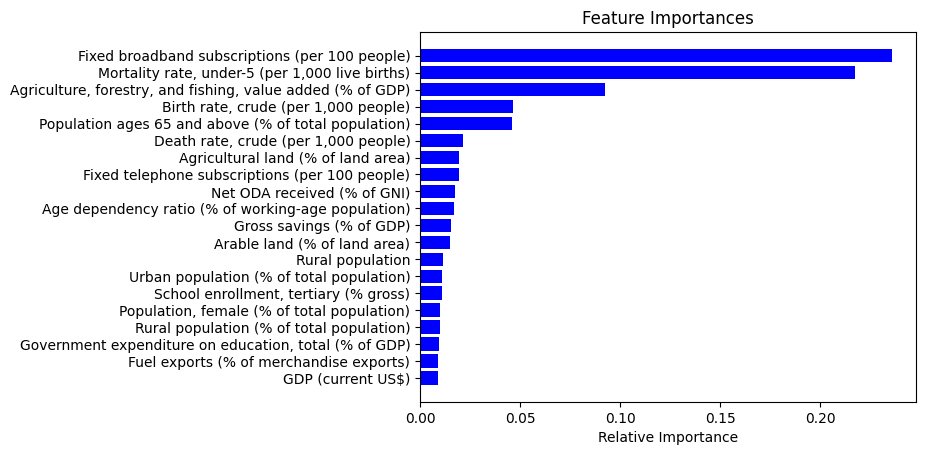

In [25]:
model = RandomForestRegressor(max_depth=best_depth,n_estimators=100)
model.fit(df[input_vars],df['GNI per capita, PPP (current international $)'])

n_features = 20

# Plot feature importance
features = df[input_vars].columns
importances = model.feature_importances_
indices = np.argsort(importances)[-n_features:]  # sort top n features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [26]:
important_features = [features[i] for i in indices]
important_features
updated_vars = []
for i in range(-1,-n_features-1,-1):
    updated_vars.append(important_features[i])
updated_vars
input_vars = updated_vars
all_vars = input_vars.copy()
all_vars.append('GNI per capita, PPP (current international $)')

In [27]:
len(input_vars)

20

In [28]:
X = df[input_vars]
y = df['GNI per capita, PPP (current international $)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[9884.888414065046, 0.5833880792461166]

In [29]:
df = df[all_vars]

In [30]:
'GNI per capita, PPP (current international $)' in input_vars

False

# ML Model: Decision Tree

## Hyperparameter Tuning

In [31]:
# เตรียมข้อมูล X, y
X = df[input_vars]
y = df['GNI per capita, PPP (current international $)']

In [ ]:
'''
To measure the bias-variance tradeoff across different model complexities (i.e., max_depth from 2 to 20),
we fixed the ground truth y using a Decision Tree model with `max_depth = 10`.
This value was selected because it sits approximately in the middle of the tested range and provides a balanced model 
not too simple (which would underfit) and not too complex (which might overfit).

Fixing the ground truth using a reasonably well-performing model ensures a fair reference point to evaluate 
how predictions from other models deviate due to bias or variance.
'''

# 🔹 Parameters
test_percent = 0.2
train_percent = 0.9
num_iterations = 1000
num_features = len(input_vars)

# 🔹 Split
main_X_train, X_test, main_y_train, y_test = train_test_split(X.iloc[:, :num_features], y, test_size=test_percent, random_state=42)

train_size = int(len(main_X_train) * train_percent)
test_f_hat = np.zeros(num_iterations)
ground_truth_y_list = []

# ✅ Fix จุด ground truth ตลอดทั้ง iteration
ground_truth_idx = np.random.randint(len(y_test))
ground_truth_y = y_test.iloc[ground_truth_idx]

# 🔁 Iteration
for i in range(num_iterations):
    rand_index = np.random.permutation(len(main_X_train))[:train_size]
    X_train_subset = main_X_train.iloc[rand_index]
    y_train_subset = main_y_train.iloc[rand_index]

    model = DecisionTreeRegressor(max_depth=10, min_samples_split=5, random_state=42)  # max_depth ตรงนี้คือ default ที่ใช้เทียบ
    model.fit(X_train_subset, y_train_subset)
    test_pred = model.predict(X_test)

    test_f_hat[i] = test_pred[ground_truth_idx]
    ground_truth_y_list.append(ground_truth_y)

# 🔹 Evaluation
test_E_f_hat = np.mean(test_f_hat)
test_std = np.std(test_f_hat)

print(f'Ground Truth Y: {ground_truth_y:.2f}')
print(f'Average Prediction: {test_E_f_hat:.2f}')
print(f'Std of Predictions: {test_std:.2f}')

Ground Truth Y: 15990.00
Average Prediction: 14092.82
Std of Predictions: 966.64


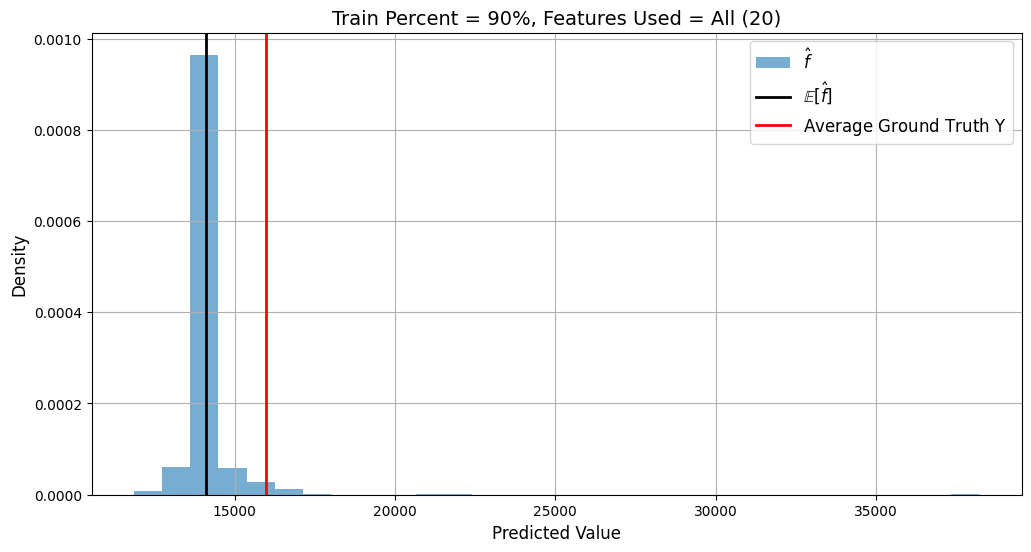

In [33]:
import matplotlib.pyplot as plt

# กำหนด max height ของ histogram
max_height = 1e-12  # ปรับให้เหมาะกับ scale ของ density (ลองปรับถ้าสูงไป/ต่ำไป)
color = 'tab:blue'

# สร้าง plot
plt.figure(figsize=(12, 6))

# 🔹 Plot distribution ของ f_hat
plt.hist(test_f_hat, bins=30, density=True, color=color, alpha=0.6, label=r'$\hat{f}$')

# 🔹 Plot ค่าคาดหวัง E[f_hat]
plt.axvline(test_E_f_hat, color='k', linewidth=2.0, label=r'$\mathbb{E}[\hat{f}]$')

# 🔹 Plot ค่าจริง ground_truth_y เฉลี่ย (เพราะสุ่มหลายรอบ)
avg_ground_truth_y = np.mean(ground_truth_y_list)
plt.axvline(avg_ground_truth_y, color='r', linewidth=2.0, label=r'$\mathrm{Average\ Ground\ Truth\ Y}$')

# 🔹 ตกแต่ง plot
plt.title(f'Train Percent = {train_percent*100:.0f}%, Features Used = All ({X.shape[1]})', fontsize=14)
plt.legend(fontsize=12)
plt.xlabel('Predicted Value', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True)

plt.show()

In [34]:
# 🔹 Parameters
test_percent = 0.2
train_percent = 0.9
num_iterations = 1000
interval = 1
start_param = 2
max_param = len(input_vars)
param_list = np.arange(start_param, max_param+1, interval).tolist()

# 🔹 Split Train/Test Set
main_X_train, X_test, main_y_train, y_test = train_test_split(X, y, test_size=test_percent, random_state=42)

# 🔹 Standardize
scaler = StandardScaler()
scaled_main_X_train = scaler.fit_transform(main_X_train)
scaled_X_test = scaler.transform(X_test)

# 🔹 Fix test sample to measure bias-variance
test_size = len(X_test)
ground_truth_idx = np.random.randint(test_size)  # สุ่ม index เดียว
ground_truth_y = y_test.iloc[ground_truth_idx]

# 🔹 Init Storage
train_size = int(len(main_X_train) * train_percent)
train_squared_error = np.zeros((len(param_list), num_iterations))
test_f_hat = np.zeros((len(param_list), num_iterations))  # prediction ที่จุดเดียวกัน

# 🔁 Loop Iteration
for i in range(num_iterations):
    rand_index = np.random.permutation(len(main_X_train))[:train_size]
    idx = main_y_train.index[rand_index]
    scaled_X_train = scaled_main_X_train[rand_index]
    y_train = main_y_train.loc[idx]

    for p in range(len(param_list)):
        num_params = param_list[p]
        param_X_train = scaled_X_train[:, :num_params]
        param_X_test = scaled_X_test[:, :num_params]

        model = DecisionTreeRegressor(max_depth=num_params, min_samples_split=5, random_state=42)
        model.fit(param_X_train, y_train)

        train_pred = model.predict(param_X_train)
        test_pred = model.predict(param_X_test)

        train_squared_error[p, i] = np.mean((y_train - train_pred) ** 2)
        test_f_hat[p, i] = test_pred[ground_truth_idx]  # เก็บค่าที่จุดเดียวกันเท่านั้น

# 🔹 After Loop: Bias^2, Var, Test Error
E_f_hat = np.mean(test_f_hat, axis=1)
bias_squared = (E_f_hat - ground_truth_y) ** 2
var_f_hat = np.var(test_f_hat, axis=1)
test_error = bias_squared + var_f_hat
train_error = np.mean(train_squared_error, axis=1)

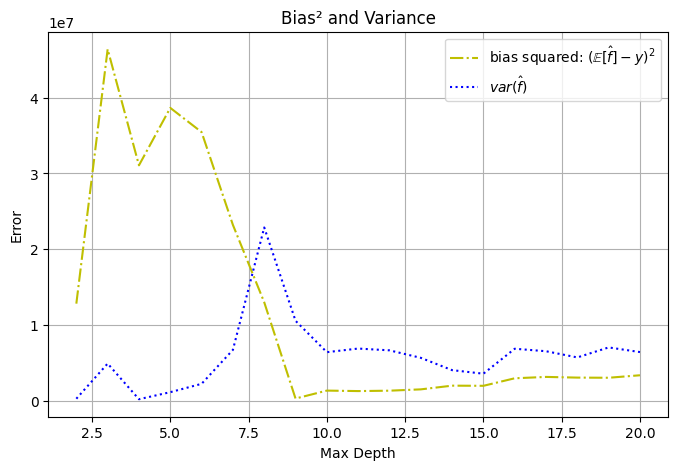

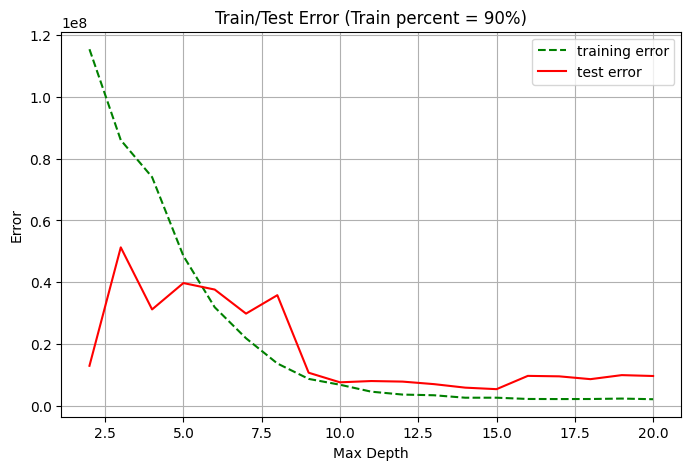

In [35]:
# 🔹 กราฟ 1: Bias² และ Variance
plt.figure(figsize=(8, 5))
plt.plot(param_list, bias_squared, 'y-.', label=r'bias squared: $(\mathbb{E}[\hat{f}] - y)^2$')
plt.plot(param_list, var_f_hat, 'b:', label=r'$var(\hat{f})$')
plt.xlabel('Max Depth')
plt.ylabel('Error')
plt.title('Bias² and Variance')
plt.legend()
plt.grid(True)
plt.show()

# 🔹 กราฟ 2: Training และ Test Error
plt.figure(figsize=(8, 5))
plt.plot(param_list, train_error, 'g--', label='training error')
plt.plot(param_list, test_error, 'r', label='test error')
plt.xlabel('Max Depth')
plt.ylabel('Error')
plt.title(f'Train/Test Error (Train percent = {int(train_percent * 100)}%)')
plt.legend()
plt.grid(True)
plt.show()

## Relationship Visualization

In [50]:
'''
จากการวิเคราะห์ bias-variance trade-off พบว่า แม้โมเดลที่มี max_depth = 12 จะมีค่า bias² ต่ำ แต่ variance เริ่มมีแนวโน้มเพิ่มขึ้น
ในขณะที่โมเดลที่มี max_depth = 15 มีทั้ง bias² และ variance ที่อยู่ในระดับสมดุลกันมากกว่า อีกทั้งยังให้ค่า test error ต่ำที่สุด
จึงพิจารณาว่า max_depth = 15 เป็นค่าที่เหมาะสมที่สุดในการใช้งานจริง เพื่อหลีกเลี่ยงทั้ง underfitting และ overfitting
'''

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# 🔹 เลือก top k features
depth = 15
final_X = X.iloc[:, :len(input_vars)]
final_y = y

# 🔹 แบ่ง Train/Test
X_train, X_test, y_train, y_test = train_test_split(final_X, final_y, test_size=0.2, random_state=42)

# 🔹 เทรนโมเดล (ใช้ best decision tree ที่ได้จาก GridSearchCV)
model = DecisionTreeRegressor(max_depth=depth, min_samples_split=5, random_state=42)
model.fit(X_train, y_train)

# 🔹 พยากรณ์
y_pred = model.predict(X_test)

# 🔹 ประเมินผล
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 🔹 แสดงผล
print(f'✅ Decision Tree Performance (Max depth = {depth})')
print(f'RMSE:           {rmse:.2f}')
print(f'MAPE:           {mape:.5f}')
print(f'R-squared (R²): {r2:.5f}')

✅ Decision Tree Performance (Max depth = 15)
RMSE:           5816.81
MAPE:           0.16710
R-squared (R²): 0.81540


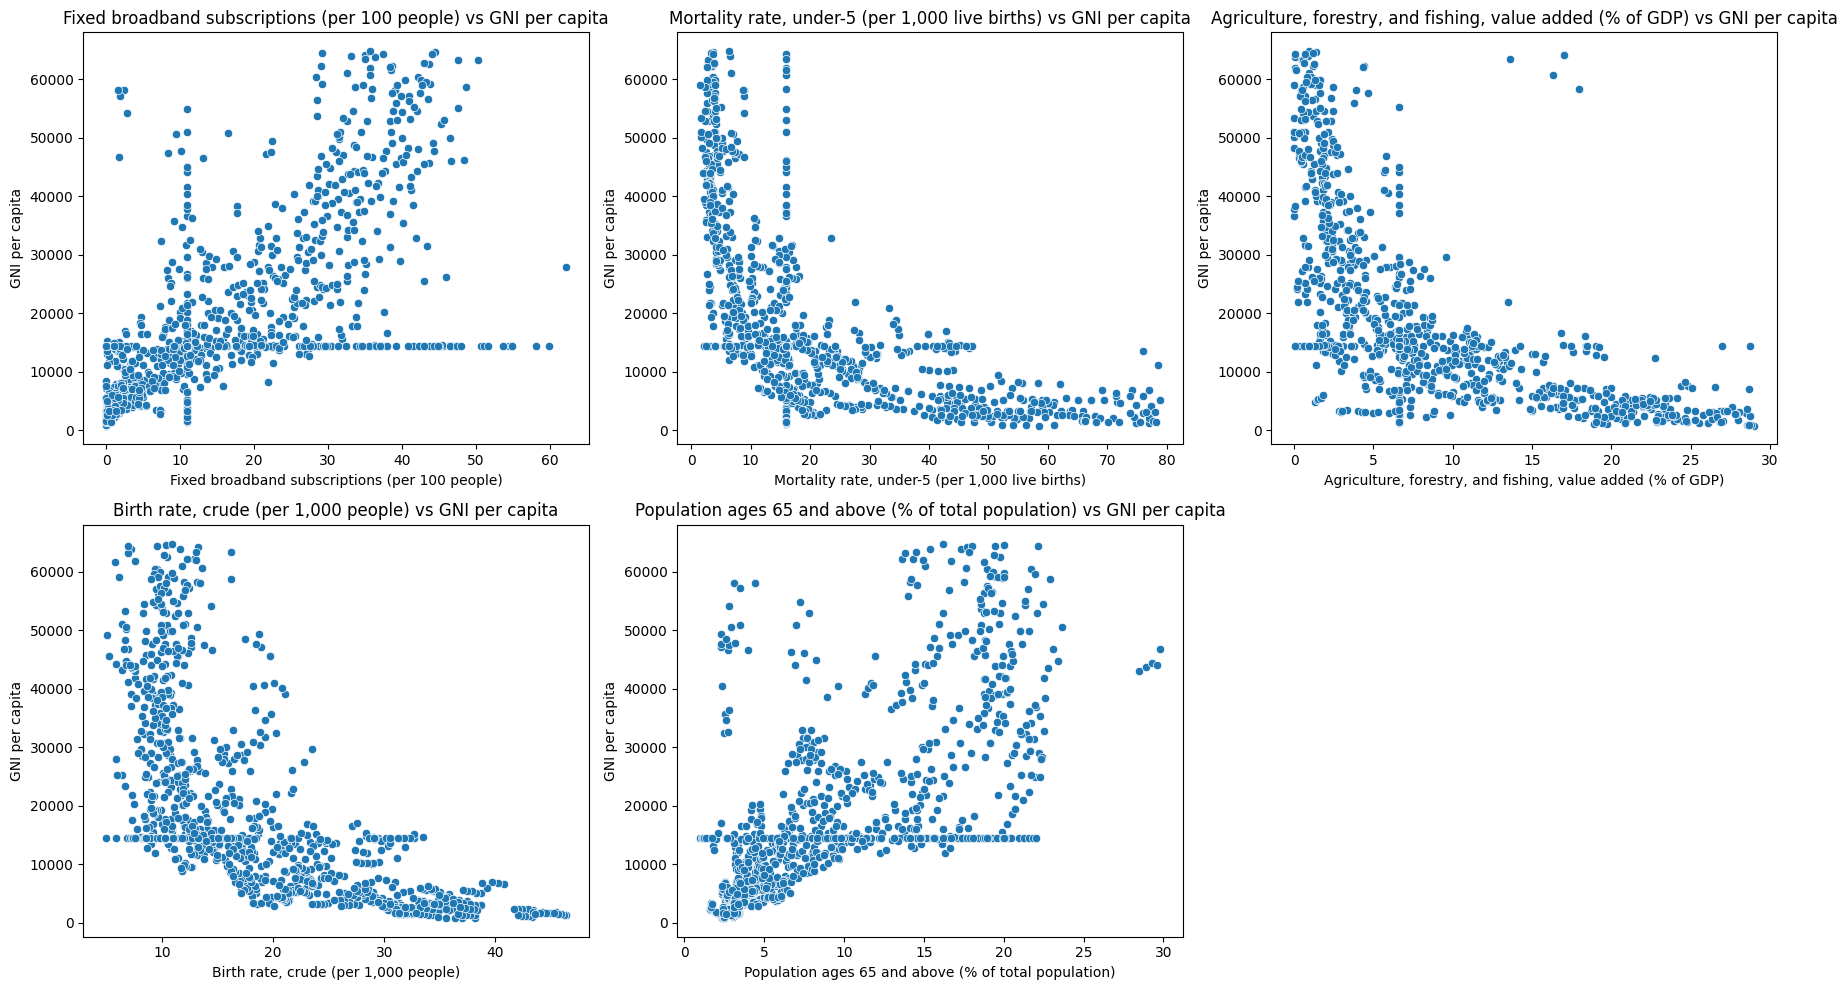

In [52]:
# 🔹 top 5 features ที่เลือกมา (หรือจะเลือก top 6, top 8 ก็ได้)
top_features = X.columns[:5]

# 🔹 วาดกราฟ
plt.figure(figsize=(18, 10))

for i, feature in enumerate(top_features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=X[feature], y=y)
    plt.xlabel(feature, fontsize=10)
    plt.ylabel('GNI per capita', fontsize=10)
    plt.title(f'{feature} vs GNI per capita')

plt.tight_layout()
plt.show()

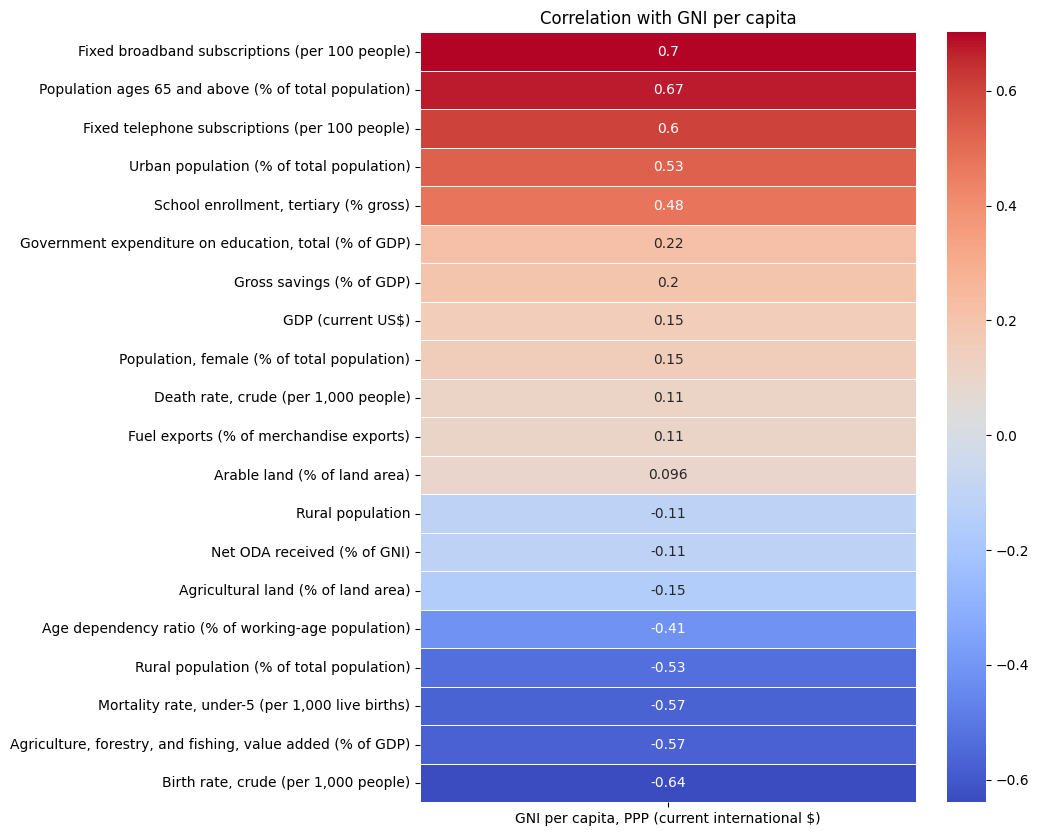

In [54]:
# 🔹 รวม features กับ target เข้าเป็น DataFrame เดียวกัน
df_corr = pd.concat([X.iloc[:, :20], y], axis=1)

# 🔹 คำนวณ Pearson correlation
corr_matrix = df_corr.corr()

# 🔹 ดูเฉพาะความสัมพันธ์ระหว่างแต่ละ feature กับ target
corr_with_target = corr_matrix[y.name].drop(y.name).sort_values(ascending=False)

# 🔹 วาด Heatmap ของ correlation เฉพาะ 20 features กับ target
plt.figure(figsize=(8, 10))
sns.heatmap(corr_with_target.to_frame(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation with GNI per capita')
plt.show()

In [55]:
input_vars

['Fixed broadband subscriptions (per 100 people)',
 'Mortality rate, under-5 (per 1,000 live births)',
 'Agriculture, forestry, and fishing, value added (% of GDP)',
 'Birth rate, crude (per 1,000 people)',
 'Population ages 65 and above (% of total population)',
 'Death rate, crude (per 1,000 people)',
 'Agricultural land (% of land area)',
 'Fixed telephone subscriptions (per 100 people)',
 'Net ODA received (% of GNI)',
 'Age dependency ratio (% of working-age population)',
 'Gross savings (% of GDP)',
 'Arable land (% of land area)',
 'Rural population',
 'Urban population (% of total population)',
 'School enrollment, tertiary (% gross)',
 'Population, female (% of total population)',
 'Rural population (% of total population)',
 'Government expenditure on education, total (% of GDP)',
 'Fuel exports (% of merchandise exports)',
 'GDP (current US$)']